# Monte Carlo A

Simple Monte Carlo Demostration

In [1]:
import numpy as np
np.set_printoptions(precision = 4)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# generate random variable subject to different distribution
np.random.rand(10)
np.random.normal(loc = 0, scale = 1, size = 10)
np.random.standard_normal(10)

array([-1.8212, -0.412 ,  1.1349,  1.5614, -1.0133,  1.5786,  0.5328,
        0.3124, -0.6516,  0.8213])

In [3]:
# impose correlation to random variable
corr = np.array([[1, 0.6],
                 [0.6, 1]])
LT = np.linalg.cholesky(corr).T # cholesky decomposition
dz = np.random.standard_normal((10000,2)) # 10000 * 2 standard normal
dz = np.dot(dz,LT) # impose correlation

print(np.corrcoef(dz[:,0],dz[:,1])) # check the correlation of the new array

[[1.     0.6002]
 [0.6002 1.    ]]


Simulate two stock prices with correlation of 0.6

In [4]:
S0 = 100
r = 0.02
sigma = 0.2
dt = 1/256
path = 100

S = np.zeros((path,2)) # Initiate the array for stock price
S[0] = S0 * np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*dz[0]) # BSM formula
for i in range(1,path):
    S[i] = S[i-1] * np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*dz[i])
    

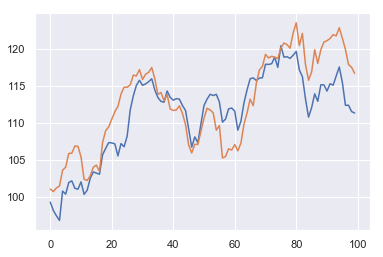

In [5]:
x = np.arange(path)
plt.plot(x, S);